In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [3]:
df.columns

Index(['age', 'sex', 'BP', 'cholesterol', 'heart disease'], dtype='object')

In [4]:
df.head()

,age,sex,BP,cholesterol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
#y = df['heart disease']
y = df['heart disease'].copy()

In [6]:
from sklearn.model_selection import train_test_split

In [76]:
import random
random.seed(2020)
np.random.seed(2020)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [46]:
# # If you're on windows:
# # Specifing path for dot file.
#import os
#os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'
#os.environ["PATH"] += os.pathsep + 'D:\Graphviz\bin'

## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
y_train.head()

84     0
251    0
92     1
201    1
126    1
Name: heart disease, dtype: int64

In [49]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3, oob_score=True)

In [77]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [51]:
rf.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1608637542, splitter='best')

In [52]:
sample_tree = rf.estimators_[4]

In [1]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

D:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Creating helper functions to evaluate model performance and help plot the decision tree

In [54]:
def get_dt_graph(classifier):
    dot_data = StringIO()
    export_graphviz(classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

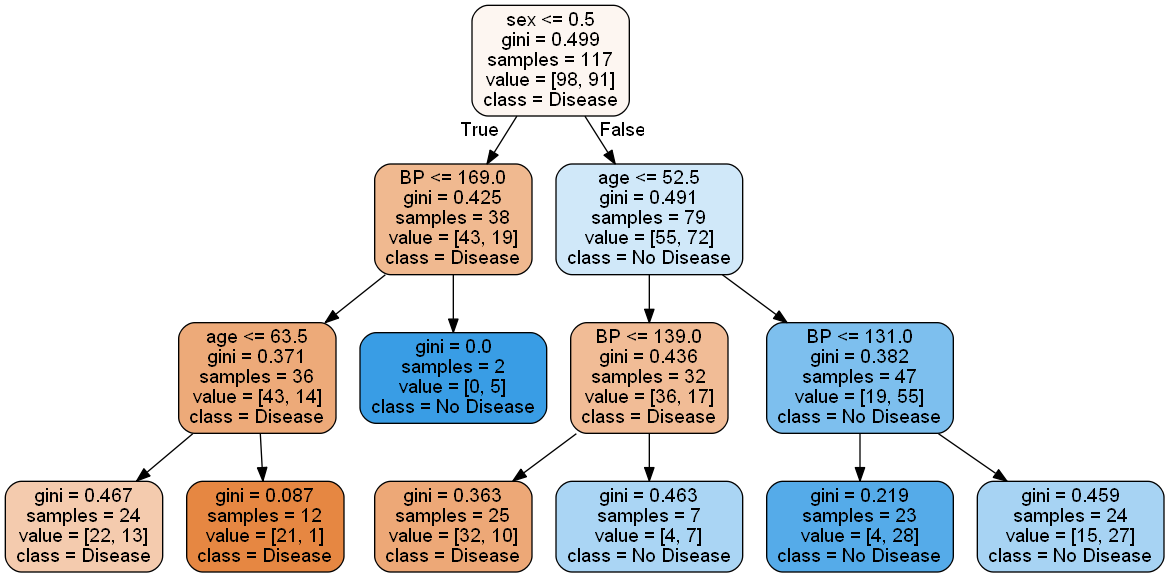

In [55]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=700, height=700)

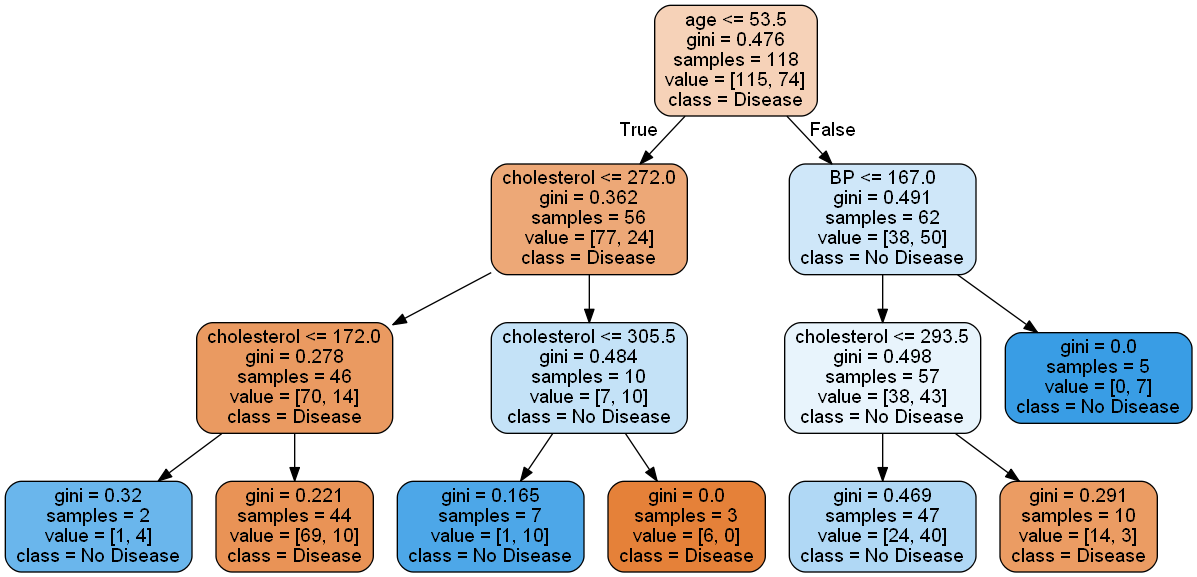

In [56]:
gph = get_dt_graph(rf.estimators_[2])
Image(gph.create_png(), width=700, height=700)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(X_test)))

In [20]:
# ORIGINAL VALUES
#evaluate_model(rf)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[80 21]
 [28 60]]
--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:
[[35 14]
 [17 15]]


In [78]:
evaluate_model(rf)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[80 21]
 [28 60]]
--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:
[[35 14]
 [17 15]]


In [60]:
rf.oob_score

True

In [75]:
rf.oob_score_

0.6349206349206349

#### Grid search for hyper-parameter tuning

In [62]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2, 3, 4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [65]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [66]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.2min


Wall time: 2min 39s


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.7min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [85]:
rf_best = grid_search.best_estimator_

In [86]:
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [82]:
#rf_best.n_jobs=1

In [87]:
#rf_best.fit(X_train, y_train)
rf_best.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
# ORIGINAL VALUES
#evaluate_model(rf_best)

Train Accuracy : 0.7724867724867724
Train Confusion Matrix:
[[80 21]
 [22 66]]
--------------------------------------------------
Test Accuracy : 0.6666666666666666
Test Confusion Matrix:
[[35 14]
 [13 19]]


In [88]:
evaluate_model(rf_best)

Train Accuracy : 0.8042328042328042
Train Confusion Matrix:
[[87 14]
 [23 65]]
--------------------------------------------------
Test Accuracy : 0.8024691358024691
Test Confusion Matrix:
[[42  7]
 [ 9 23]]


In [30]:
sample_tree = rf_best.estimators_[0]

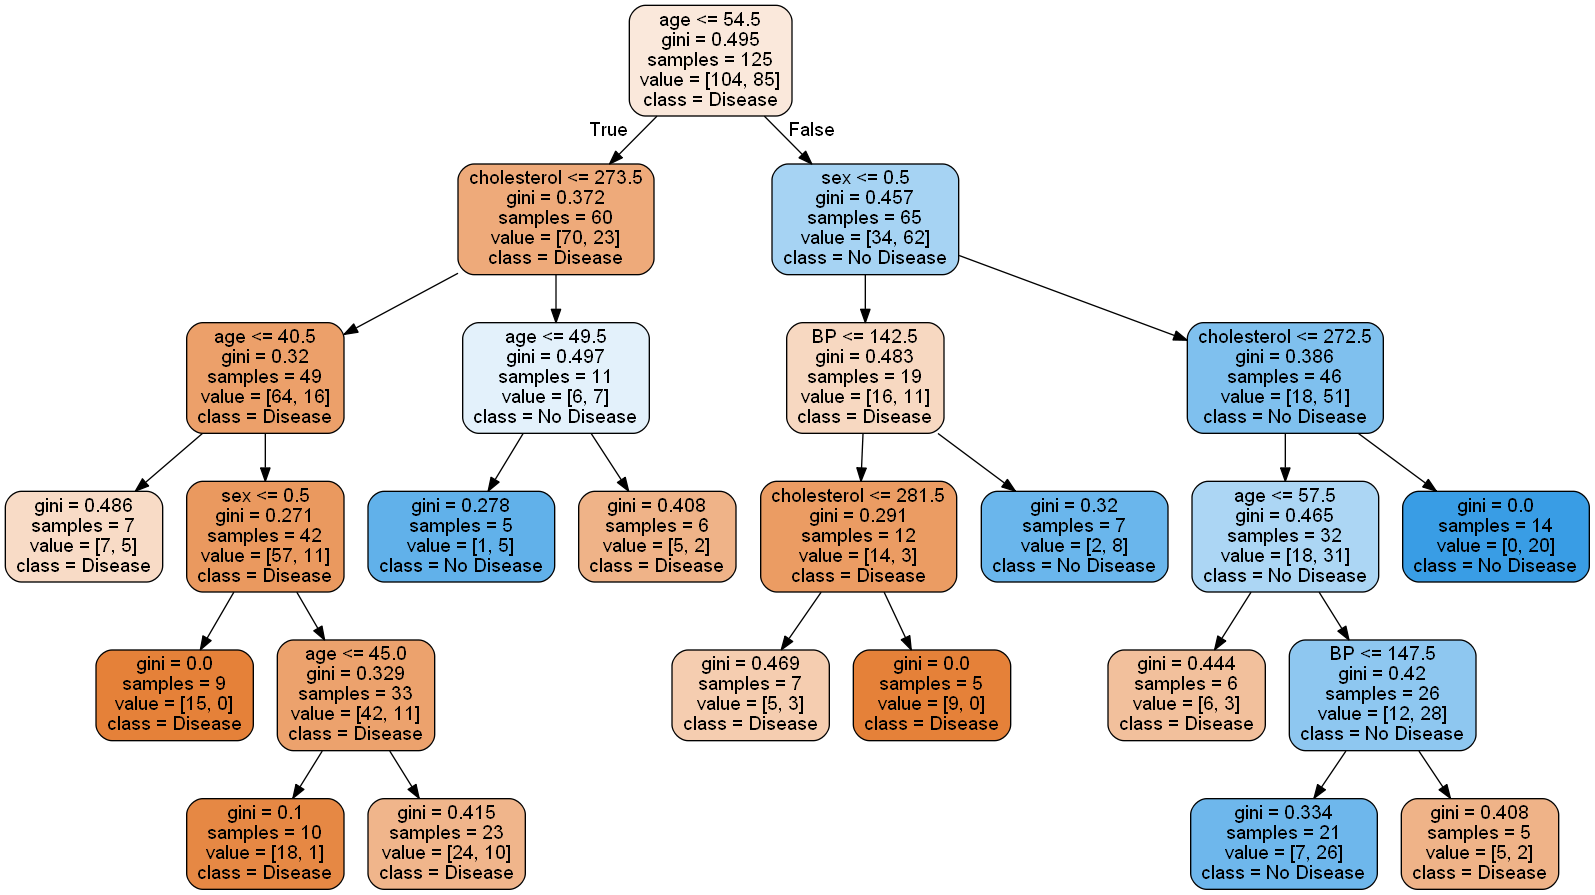

In [31]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

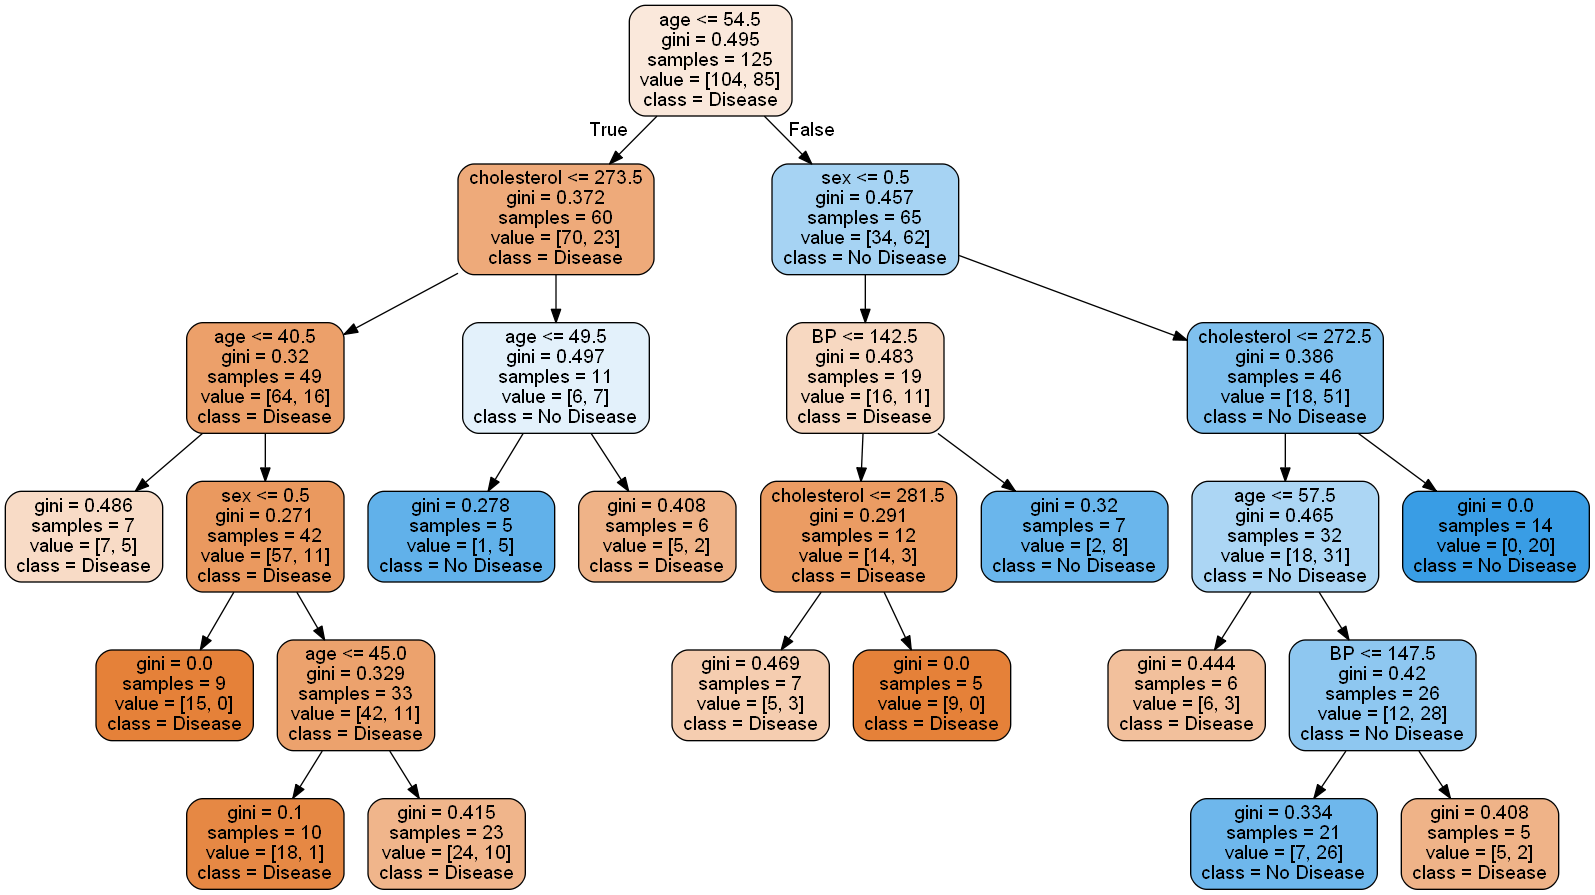

In [32]:
gph = get_dt_graph(rf_best.estimators_[0])
Image(gph.create_png(), height=600, width=600)

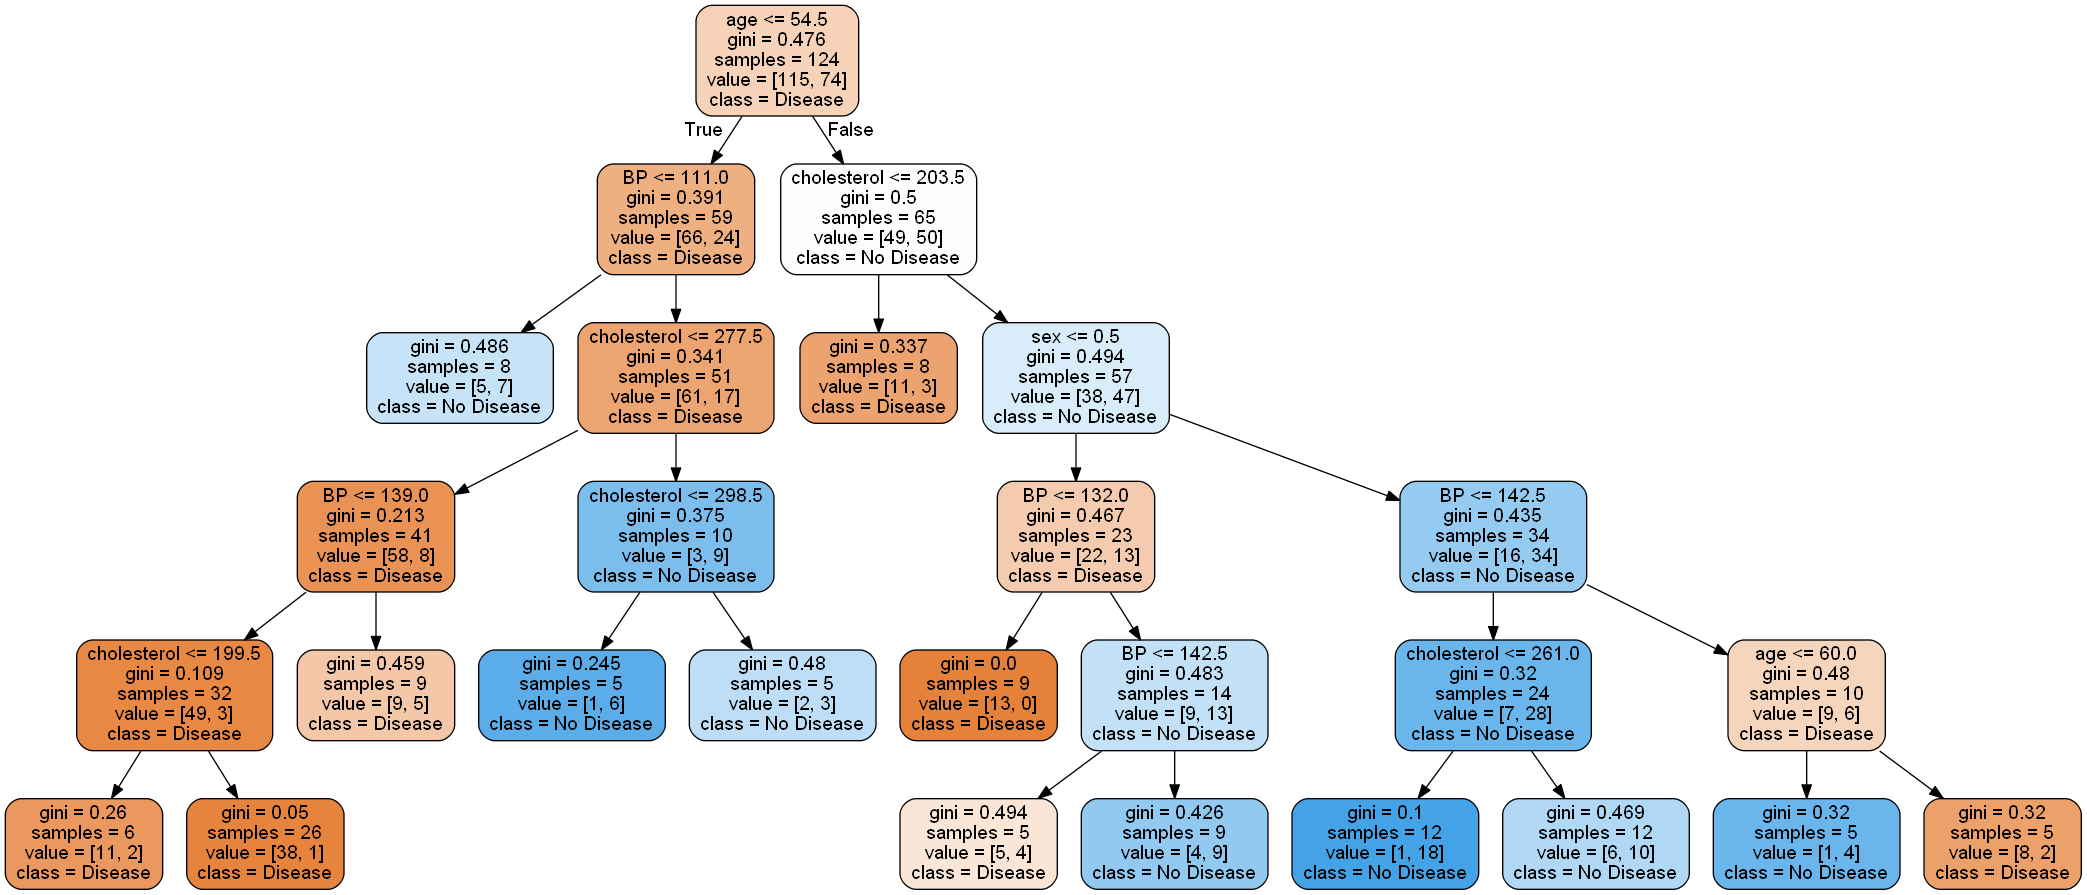

In [33]:
gph = get_dt_graph(rf_best.estimators_[10])
Image(gph.create_png(), height=600, width=600)

In [34]:
rf_2 = rf_best

In [35]:
rf_2.n_estimators=50

In [36]:
rf_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
evaluate_model(rf_2)

Train Accuracy : 0.783068783068783
Train Confusion Matrix:
[[80 21]
 [20 68]]
--------------------------------------------------
Test Accuracy : 0.654320987654321
Test Confusion Matrix:
[[35 14]
 [14 18]]


### Variable importance in RandomForest and Decision trees

In [38]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [39]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [40]:
classifier_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [41]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [42]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.375397
3,cholesterol,0.278449
2,BP,0.208346
1,sex,0.137808
